In [1]:
import numpy as np
import pandas as pd
from sklearn.metrics import accuracy_score
from matplotlib import pyplot as plt
import tensorflow as tf
import keras
from keras.models import load_model
from keras.utils import np_utils
from keras.layers import Dense, Activation, Flatten, Reshape
from keras.models import Sequential, Model
from tensorflow import keras
from tensorflow.keras import utils 
np.random.seed(42)

In [12]:
def load_dataset(flatten=False):
    (X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()
    # normalize x
    X_train = X_train.astype(float)#/255.
    X_test = X_test.astype(float)#/255.
    
    return X_train, y_train, X_test, y_test

def colored_mnist(features):
    colored = [0,0,0,0]
    for color in range(4):
        number_i_splitted = np.array_split(features, 4)
        shape = number_i_splitted[color].shape[0]
        dim = np.zeros((shape, 28, 28))
        if color == 0:
            colored[color] = np.stack((number_i_splitted[color].reshape(shape, 28, 28), dim, dim), axis = 3)
            len(colored)
        if color == 1:
            colored[color] = np.stack((dim, number_i_splitted[color].reshape(shape, 28, 28), dim), axis = 3)
        if color == 2:
            colored[color] = np.stack((dim, dim, number_i_splitted[color].reshape(shape, 28, 28)), axis = 3)
        if color == 3:
            colored[color] = np.stack((number_i_splitted[color].reshape(shape, 28, 28), number_i_splitted[color].reshape(shape, 28, 28), dim), axis = 3)

    return np.concatenate((colored[0], colored[1], colored[2], colored[3]))
        
def convert_to_3d(data):
    reShape = data.reshape(data.shape[0], 28, 28)
    return np.stack((reShape, reShape, reShape), axis = 3)

def plot_samples(data, title="TITLE"):
    
    numberOfRow = 2
    numberOfCol = 5# plot images
    number = 20
    fig, axes = plt.subplots(4, numberOfCol, figsize=(2.5*numberOfCol,3.2*numberOfRow))
    for i in range(number):
        images = data[15000*(i%4):(15000)*(i%4)+number]
        labels = y_train[15000*(i%4):(15000)*(i%4)+number]
        ax = axes[i//numberOfCol, i%numberOfCol]
        ax.imshow(images[i]/255, interpolation='none')
        ax.set_title('Number: {}'.format(labels[i]))
        ax.axis("off")
    fig.suptitle(title, fontsize=16)
    plt.tight_layout()
    plt.show()
    



def model_history(X, y, x_test, y_test, file_name = "Model.h5"):
    s = tf.keras.backend.clear_session()
    epoch_size = 10
    
    model = Sequential()  
    model.add(Dense(256, input_shape=(2352,))) 
    model.add(Activation('relu'))
    model.add(Dense(256))
    model.add(Activation('relu'))
    model.add(Dense(10))
    model.add(Activation('softmax'))
    optimizer = keras.optimizers.Adagrad()
    model.compile(
        loss='categorical_crossentropy',
        optimizer=optimizer,
        metrics=['accuracy']
    )
    from tensorflow.keras import utils 
    hist = model.fit(
        X, 
        y,
        batch_size=64,
        epochs=epoch_size,
        validation_data = (x_test, y_test),
        shuffle=True,
        verbose=0
    )
    model.save(file_name)
    
    return hist

def loss(model, X, y, verbose = 0):
    return model.evaluate(X, y, verbose)

def plot_history_loss_and_acc(history_keras_nn):
    
    fig, axs = plt.subplots(1,2, figsize=(12,4))

    axs[0].plot(history_keras_nn[0].history['loss'])
    axs[0].plot(history_keras_nn[0].history['val_loss'])
    axs[0].set_title('Cross Entropy Loss for Original Data')
    axs[0].set_ylabel('loss')
    axs[0].set_xlabel('epoch')
    axs[0].legend(['train', 'validation'], loc='upper right')

    axs[1].plot(history_keras_nn[1].history['loss'])
    axs[1].plot(history_keras_nn[1].history['val_loss'])
    axs[1].set_title('Cross Entropy Loss for Colored Data')
    axs[1].set_ylabel('accuracy')
    axs[1].set_xlabel('epoch')
    axs[1].legend(['train', 'validation'], loc='upper right')

    plt.show()

In [13]:
X_train, y_train, X_test, y_test = load_dataset()

print("3 channel X_train shape: ",convert_to_3d(X_train).shape)
print("3 channel X_test_3d shape: ", convert_to_3d(X_test).shape)
print("Colored X_train shape: ", colored_mnist(X_train).shape)
print("Colored X_test shape: ", colored_mnist(X_test).shape)
print('\nFlatten Shapes:')
print("X_test flat shape: ",Flatten()(X_test).shape)
print("X_train_3d_flat shape: ", Flatten()(convert_to_3d(X_train)).shape)
print("X_test_3d_flat shape: ", Flatten()(convert_to_3d(X_test)).shape)
print("colored_train flat shape: ",Flatten()(colored_mnist(X_train)).shape)
print("colored_test flat shape: ",Flatten()(colored_mnist(X_test)).shape)

3 channel X_train shape:  (60000, 28, 28, 3)
3 channel X_test_3d shape:  (10000, 28, 28, 3)
Colored X_train shape:  (60000, 28, 28, 3)
Colored X_test shape:  (10000, 28, 28, 3)

Flatten Shapes:
X_test flat shape:  (10000, 784)
X_train_3d_flat shape:  (60000, 2352)
X_test_3d_flat shape:  (10000, 2352)
colored_train flat shape:  (60000, 2352)
colored_test flat shape:  (10000, 2352)


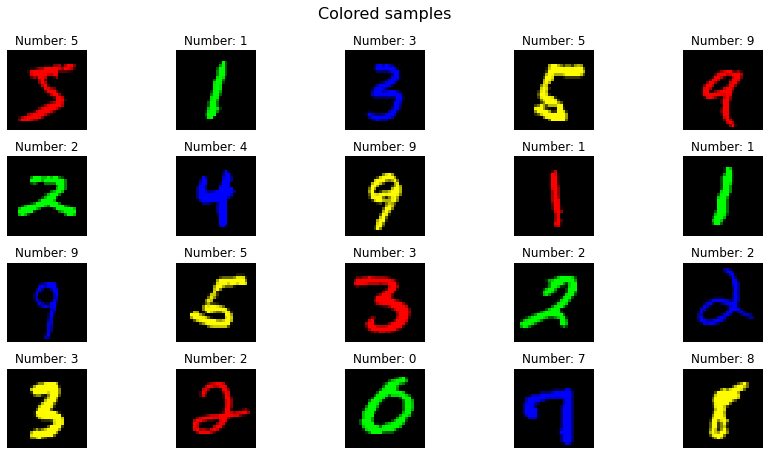

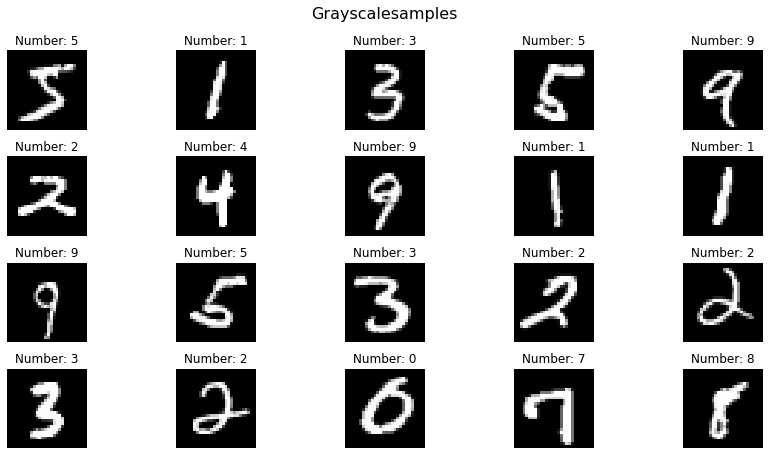

In [14]:
plot_samples(colored_mnist(X_train), "Colored samples")
plot_samples(convert_to_3d(X_train), "Grayscalesamples")

In [15]:
y_train_oh = np_utils.to_categorical(y_train, 10)
y_test_oh = np_utils.to_categorical(y_test, 10)

X_train_3d_flat = Flatten()(convert_to_3d(X_train))
X_test_3d_flat = Flatten()(convert_to_3d(X_test))
hist_X_train = model_history(X_train_3d_flat, y_train_oh, X_test_3d_flat, y_test_oh, "X_train_flat_model.h5")
X_train_flat_model = load_model("X_train_flat_model.h5")

colored_train_flat = Flatten()(colored_mnist(X_train))
colored_test_flat = Flatten()(colored_mnist(X_test))
hist_colored = model_history(colored_train_flat, y_train_oh, colored_test_flat, y_test_oh, "colored_train_flat_model.h5")
colored_train_flat_model = load_model("colored_train_flat_model.h5")

In [ ]:
d = {'train_loss':       [loss(colored_train_flat_model, colored_train_flat, y_train_oh)[0],
                          loss(X_train_flat_model, X_train_3d_flat, y_train_oh)[0]], 
     
    'original_val_loss': [loss(colored_train_flat_model, X_test_3d_flat, y_test_oh)[0],
                          loss(X_train_flat_model, X_test_3d_flat, y_test_oh)[0]],
     
    'colored_val_loss':  [loss(colored_train_flat_model, colored_test_flat, y_test_oh)[0],
                          loss(X_train_flat_model, colored_test_flat, y_test_oh)[0]],
    'original_val_accuracy': [loss(colored_train_flat_model, X_test_3d_flat, y_test_oh)[1],
                              loss(X_train_flat_model, X_test_3d_flat, y_test_oh)[1]],
    'colored_val_accuracy': [loss(colored_train_flat_model, colored_test_flat, y_test_oh)[1],
                              loss(X_train_flat_model, colored_test_flat, y_test_oh)[1]]}

In [ ]:
pd.DataFrame(d, index = ["Colored_MLP_model", "Original_MLP_model"])

In [ ]:
histories = [hist_X_train, hist_colored]
plot_history_loss_and_acc(histories)